# Impact of Lockdown on Immunity

Consider a seasonal SIRS model with a period of no circulation.


In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
from scipy import integrate
import matplotlib.pyplot as plt

In [17]:
def sirs_dx(t,x,betafun,A,gamma,omega,V):
    yr = t/365.0
    beta = betafun(yr)
    if (x[0] > 0):
        vv = V
    else:
        vv = 0.
    dx = np.zeros(4)
    dx[0] = -beta*(x[0])*(x[1]) + omega*x[2] - vv
    dx[1] = beta*(x[0])*(x[1]) - gamma*x[1]
    dx[2] = gamma*x[1] - omega*x[2] + vv
    dx[3] = beta*(x[0])*(x[1])
    return dx

In [48]:
beta0 = 0.55
A = 0.1
gamma = 0.2
R0 = beta0/gamma
omega = 0.003
V = 0.
i0 = 0.0001
ypre = 16
ylock = 1
ypost = 3
tmax = (ypre + ylock + ypost)*365.0

In [49]:
def mybf(yr):
    if (yr <= ypre) or (yr >= (ypre + ylock)):
        return (beta0 + A*np.sin(2.0*np.pi*yr))
    else:
        return 0.5*gamma

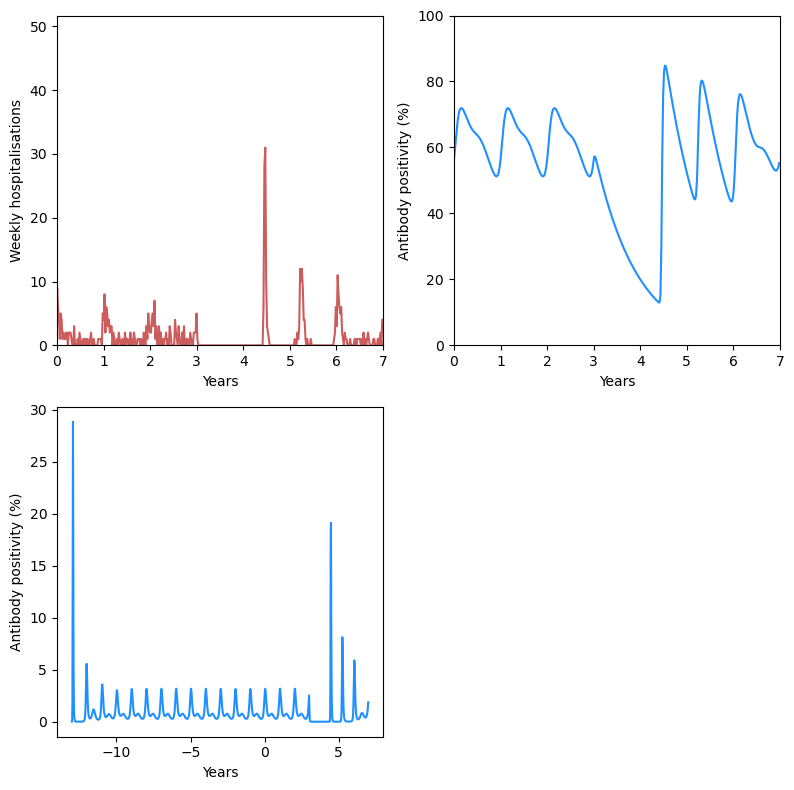

In [50]:
odefun = lambda t,x: sirs_dx(t,x,mybf,A,gamma,omega,V)

sol = integrate.solve_ivp(odefun,
                          t_span = (0.0,tmax), 
                          y0 = np.array([1.-i0, i0, 0.0, 0.0]), #initial conditions
                          t_eval = np.arange(0.0,tmax,7),
                          method = 'RK45',
                          atol=1e-12,
                          rtol=1e-12,
                         )

np.random.seed(198)
hh = np.random.poisson(100*np.diff((sol.y[3]).T))

tt = (sol.t/365.0) - 13
ii = 100.*(sol.y[1]).T
rr = 100.*(sol.y[2]).T

plt.figure(figsize=(8,8))

plt.subplot(2,2,1)
plt.plot(tt[1:],hh, c='indianred')
plt.xlabel('Years')
plt.ylabel('Weekly hospitalisations')
plt.xlim([0.,7])
plt.ylim([0.,1.1*np.max(hh)])

plt.subplot(2,2,2)
plt.plot(tt,rr, c='dodgerblue')
plt.xlabel('Years')
plt.ylabel('Antibody positivity (%)')
plt.xlim([0.,7])
plt.ylim([0.,100])

plt.subplot(2,2,3)
plt.plot(tt,ii, c='dodgerblue')
plt.xlabel('Years')
plt.ylabel('Antibody positivity (%)')
#plt.xlim([0.,7])
#plt.ylim([0.,100])


plt.tight_layout()
#plt.savefig('./rsv_stylised.pdf')

In [44]:
bb = np.array([mybf(u)/gamma for u in sol.t/365.0])

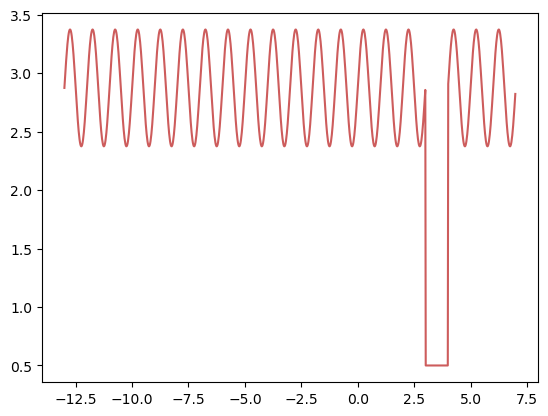

In [45]:
plt.plot(tt,bb, c='indianred')